Robust MPC: Simulation with linearized rocket system

In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [30]:
from LandMPC_template.MPCControl_z_Claudev4 import MPCControl_z
from src.rocket import Rocket
from src.pos_rocket_vis import *

# Require ipympl
%matplotlib widget 

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

sim_time = 8.0  # simulation length in seconds
x0 = np.array([0.]*9 + [0.,0.,10.])
x_ref = np.array([0.]*9 + [1.,0.,3.])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
sys = rocket.linearize_sys(xs, us)
A, B = sys.A, sys.B


H = 2.0
mpc = MPCControl_z(A, B, xs, us, Ts, H)

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]

Constraints in delta coordinates:
  u ∈ [-16.67, 23.33]
  x[1] (z) ≥ -3.00

Ancillary controller:
  K = [-4.26354866 -1.55197131]
  Closed-loop eigenvalues: [0.98138728+0.01802712j 0.98138728-0.01802712j]
  Spectral radius: 0.9816
  RPI set complexity too high at iteration 50, stopping
  RPI set bounds: vz ± 0.00 m/s, z ± 9.67 m
  Used for tightening (100%): vz ± 0.00 m/s, z ± 9.67 m

Tightened constraints:
  X_tilde: z ≥ 6.67
  U_tilde: ΔPavg ∈ [-1.67, 8.33] (range: 10.00)
  U_tilde (absolute): Pavg ∈ [55.00, 65.00]

Terminal set X_f (conservative box):
  vz ∈ [-2.00, 2.00] m/s
  z ∈ [2.00, -2.00] m

Robust Tube MPC setup complete:
  - Horizon: 40 steps (2.0s)
  - FULL tightening for extreme disturbance robustness
  - Soft constraints with penalty: 2000.0


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=159, step=2), IntSlider(value=0…

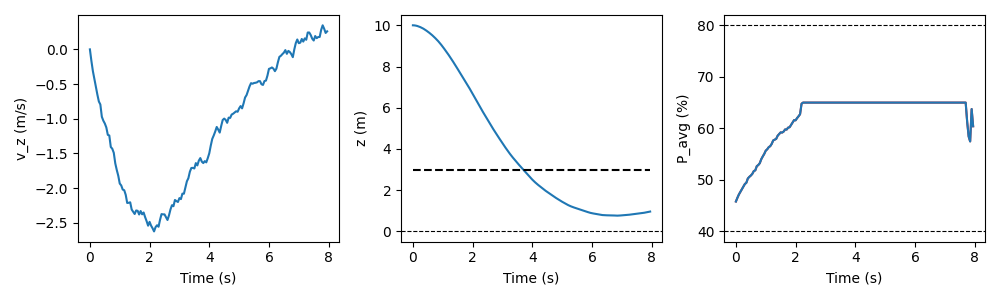

In [31]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='random')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

In [32]:
t_cl, x_cl, u_cl = rocket.simulate_subsystem(mpc, sim_time, x0, w_type='extreme')
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs, 'sys_z')

State violation: [vz,z]=[-4.93117456 -0.21149031], [LBX, UBX]=(array([-inf,   0.]), array([inf, inf]))


ValueError: Constraints violation detected, terminating...